# Supervised Training

In [1]:
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.manifold import TSNE
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
import seaborn as sns

2023-12-05 15:54:12.676226: I tensorflow/core/platform/cpu_feature_guard.cc:183] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
train_ds = 'affectnet/'
len(os.listdir(train_ds))

10

In [3]:
labels = sorted([folder for folder in os.listdir('affectnet') if '.' not in folder])
labels

['anger', 'contempt', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [4]:
def show_predictions(model, images, n_images=10):
    predictions = model.predict(images[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index).set_title(labels[np.argmax(predictions[image_index])])
        plt.imshow(images[image_index].numpy().astype('uint8'))

### Base affectnet dataset and training

In [2]:
affectnet_train = keras.utils.image_dataset_from_directory(
    directory = 'affectnet/',
    labels = 'inferred',
    label_mode = 'categorical',
    image_size = (200, 200),
    batch_size = 32,
    validation_split = 0.2,
    subset = 'training',
    seed = 42
)

Found 29042 files belonging to 8 classes.
Using 23234 files for training.


2023-12-05 15:31:25.940078: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1636] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 78823 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:07:00.0, compute capability: 8.0
2023-12-05 15:31:25.944380: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1636] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 78823 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:0f:00.0, compute capability: 8.0
2023-12-05 15:31:25.946073: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1636] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 78823 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:47:00.0, compute capability: 8.0
2023-12-05 15:31:25.947608: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1636] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 78823 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-80GB, pci bu

In [40]:
affectnet_val = keras.utils.image_dataset_from_directory(
    directory = 'affectnet/',
    labels = 'inferred',
    label_mode = 'categorical',
    image_size = (200, 200),
    batch_size = 32,
    validation_split = 0.2,
    subset = 'validation',
    seed = 42
)

Found 29042 files belonging to 8 classes.
Using 5808 files for validation.


In [4]:
model = keras.models.Sequential([
    keras.layers.Rescaling(1.0/255, input_shape=(200, 200, 3)),   
    keras.layers.Conv2D(kernel_size = 3, filters = 64, padding = "same", activation = 'relu'),
    keras.layers.Conv2D(kernel_size = 3, filters = 64, padding = "same", activation = 'relu'),
    keras.layers.Conv2D(kernel_size = 3, filters = 64, padding = "same", activation = 'relu'),
    keras.layers.Conv2D(kernel_size = 3, filters = 64, padding = "same", activation = 'relu'),
    keras.layers.Conv2D(kernel_size = 3, filters = 64, padding = "same", activation = 'relu'),
    keras.layers.Conv2D(kernel_size = 3, filters = 64, padding = "same", activation = 'relu'),
    keras.layers.Conv2D(kernel_size = 3, filters = 64, padding = "same", activation = 'relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(kernel_size = 3, filters = 64, padding = "same", activation = 'relu'),
    keras.layers.Conv2D(kernel_size = 3, filters = 64, padding = "same", activation = 'relu'),
    keras.layers.Conv2D(kernel_size = 3, filters = 64, padding = "same", activation = 'relu'),
    keras.layers.Conv2D(kernel_size = 3, filters = 64, padding = "same", activation = 'relu'),
    keras.layers.Conv2D(kernel_size = 3, filters = 64, padding = "same", activation = 'relu'),
    keras.layers.Conv2D(kernel_size = 3, filters = 64, padding = "same", activation = 'relu'),
    keras.layers.Conv2D(kernel_size = 3, filters = 64, padding = "same", activation = 'relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(kernel_size = 3, filters = 64, padding = "same", activation = 'relu'),
    keras.layers.Conv2D(kernel_size = 3, filters = 64, padding = "same", activation = 'relu'),
    keras.layers.Conv2D(kernel_size = 3, filters = 64, padding = "same", activation = 'relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='selu'),
    keras.layers.Dense(8, activation = 'softmax')
])

In [5]:
model.compile(loss = 'categorical_crossentropy',
                    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00005),
                    metrics = 'accuracy')

In [6]:
model.fit(affectnet_train, validation_data = affectnet_val,
                epochs = 5)

Epoch 1/5


2023-12-05 15:31:37.006718: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8904
2023-12-05 15:31:38.159024: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:625] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-12-05 15:31:38.371079: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55ecbaf5b630 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-05 15:31:38.371128: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA A100-SXM4-80GB, Compute Capability 8.0
2023-12-05 15:31:38.371133: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (1): NVIDIA A100-SXM4-80GB, Compute Capability 8.0
2023-12-05 15:31:38.371137: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (2): NVIDIA A100-SXM4-80GB, Compute Capability 8.0
2023-12-05 15:31:38.371141: I tensorflow/compil

727/727 [==============================] - 61s 73ms/step - loss: 1.3639 - accuracy: 0.4734 - val_loss: 1.2012 - val_accuracy: 0.5475
Epoch 2/5
727/727 [==============================] - 52s 71ms/step - loss: 1.0536 - accuracy: 0.6052 - val_loss: 1.1155 - val_accuracy: 0.5837
Epoch 3/5
727/727 [==============================] - 52s 71ms/step - loss: 0.8254 - accuracy: 0.6991 - val_loss: 1.4240 - val_accuracy: 0.5611
Epoch 4/5
727/727 [==============================] - 52s 71ms/step - loss: 0.4696 - accuracy: 0.8386 - val_loss: 2.0897 - val_accuracy: 0.5668
Epoch 5/5
727/727 [==============================] - 52s 71ms/step - loss: 0.1939 - accuracy: 0.9361 - val_loss: 2.6743 - val_accuracy: 0.5615


1/1 [==============================] - 0s 56ms/step


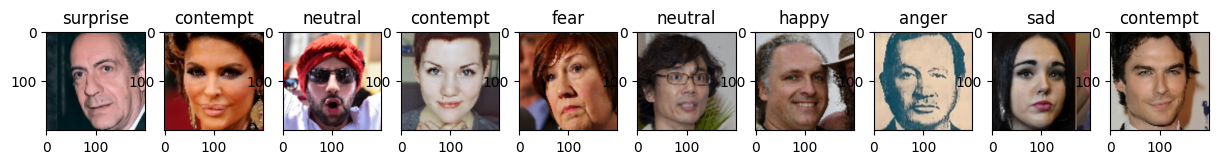

In [41]:
images,corr_labels = next(iter(affectnet_val))
show_predictions(model, images)

### Grayscale affectnet dataset and training

In [5]:
affectnet_train = keras.utils.image_dataset_from_directory(
    directory = 'affectnet/',
    labels = 'inferred',
    label_mode = 'categorical',
    image_size = (200, 200),
    batch_size = 32,
    validation_split = 0.2,
    subset = 'training',
    color_mode = 'grayscale',
    seed = 42
)

Found 29042 files belonging to 8 classes.
Using 23234 files for training.


2023-12-05 15:49:04.112904: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1636] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 78823 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:07:00.0, compute capability: 8.0
2023-12-05 15:49:04.117176: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1636] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 78823 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:0f:00.0, compute capability: 8.0
2023-12-05 15:49:04.118745: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1636] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 78823 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:47:00.0, compute capability: 8.0
2023-12-05 15:49:04.120287: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1636] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 78823 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-80GB, pci bu

In [6]:
affectnet_val = keras.utils.image_dataset_from_directory(
    directory = 'affectnet/',
    labels = 'inferred',
    label_mode = 'categorical',
    image_size = (200, 200),
    batch_size = 32,
    validation_split = 0.2,
    subset = 'validation',
    color_mode = 'grayscale',
    seed = 42
)

Found 29042 files belonging to 8 classes.
Using 5808 files for validation.


In [7]:
model = keras.models.Sequential([
    keras.layers.Rescaling(1.0/255, input_shape=(200, 200, 1)),   
    keras.layers.Conv2D(kernel_size = 3, filters = 64, padding = "same", activation = 'relu'),
    keras.layers.Conv2D(kernel_size = 3, filters = 64, padding = "same", activation = 'relu'),
    keras.layers.Conv2D(kernel_size = 3, filters = 64, padding = "same", activation = 'relu'),
    keras.layers.Conv2D(kernel_size = 3, filters = 64, padding = "same", activation = 'relu'),
    keras.layers.Conv2D(kernel_size = 3, filters = 64, padding = "same", activation = 'relu'),
    keras.layers.Conv2D(kernel_size = 3, filters = 64, padding = "same", activation = 'relu'),
    keras.layers.Conv2D(kernel_size = 3, filters = 64, padding = "same", activation = 'relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(kernel_size = 3, filters = 64, padding = "same", activation = 'relu'),
    keras.layers.Conv2D(kernel_size = 3, filters = 64, padding = "same", activation = 'relu'),
    keras.layers.Conv2D(kernel_size = 3, filters = 64, padding = "same", activation = 'relu'),
    keras.layers.Conv2D(kernel_size = 3, filters = 64, padding = "same", activation = 'relu'),
    keras.layers.Conv2D(kernel_size = 3, filters = 64, padding = "same", activation = 'relu'),
    keras.layers.Conv2D(kernel_size = 3, filters = 64, padding = "same", activation = 'relu'),
    keras.layers.Conv2D(kernel_size = 3, filters = 64, padding = "same", activation = 'relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(kernel_size = 3, filters = 64, padding = "same", activation = 'relu'),
    keras.layers.Conv2D(kernel_size = 3, filters = 64, padding = "same", activation = 'relu'),
    keras.layers.Conv2D(kernel_size = 3, filters = 64, padding = "same", activation = 'relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='selu'),
    keras.layers.Dense(8, activation = 'softmax')
])

In [8]:
model.compile(loss = 'categorical_crossentropy',
                    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00005),
                    metrics = 'accuracy')

In [9]:
model.fit(affectnet_train, validation_data = affectnet_val,
                epochs = 5)

Epoch 1/5


2023-12-05 15:49:09.935375: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8904
2023-12-05 15:49:11.092802: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:625] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-12-05 15:49:11.374492: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5613df0dc330 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-05 15:49:11.374539: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA A100-SXM4-80GB, Compute Capability 8.0
2023-12-05 15:49:11.374544: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (1): NVIDIA A100-SXM4-80GB, Compute Capability 8.0
2023-12-05 15:49:11.374548: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (2): NVIDIA A100-SXM4-80GB, Compute Capability 8.0
2023-12-05 15:49:11.374552: I tensorflow/compil

727/727 [==============================] - 61s 70ms/step - loss: 1.4023 - accuracy: 0.4566 - val_loss: 1.2068 - val_accuracy: 0.5377
Epoch 2/5
727/727 [==============================] - 49s 68ms/step - loss: 1.0656 - accuracy: 0.6017 - val_loss: 1.2117 - val_accuracy: 0.5770
Epoch 3/5
727/727 [==============================] - 49s 67ms/step - loss: 0.8512 - accuracy: 0.6914 - val_loss: 1.3480 - val_accuracy: 0.5797
Epoch 4/5
727/727 [==============================] - 49s 67ms/step - loss: 0.5289 - accuracy: 0.8166 - val_loss: 1.9018 - val_accuracy: 0.5758
Epoch 5/5
727/727 [==============================] - 49s 67ms/step - loss: 0.2221 - accuracy: 0.9257 - val_loss: 2.5517 - val_accuracy: 0.5751


1/1 [==============================] - 0s 347ms/step


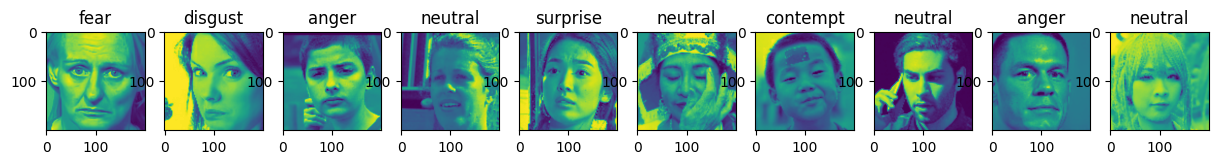

In [10]:
images,corr_labels = next(iter(affectnet_val))
show_predictions(model, images)

### Cropped affectnet dataset and training

In [5]:
affectnet_train = keras.utils.image_dataset_from_directory(
    directory = 'affectnet/',
    labels = 'inferred',
    label_mode = 'categorical',
    image_size = (200, 200),
    batch_size = 32,
    validation_split = 0.2,
    subset = 'training',
    seed = 42
)

Found 29042 files belonging to 8 classes.
Using 23234 files for training.


2023-12-05 15:54:25.612176: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1636] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 78823 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:07:00.0, compute capability: 8.0
2023-12-05 15:54:25.616518: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1636] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 78823 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:0f:00.0, compute capability: 8.0
2023-12-05 15:54:25.618055: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1636] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 78823 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:47:00.0, compute capability: 8.0
2023-12-05 15:54:25.619787: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1636] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 78823 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-80GB, pci bu

In [6]:
affectnet_train = affectnet_train.map(lambda x, y: (tf.image.crop_to_bounding_box(x, 25, 25, 150, 150), y))

In [7]:
affectnet_val = keras.utils.image_dataset_from_directory(
    directory = 'affectnet/',
    labels = 'inferred',
    label_mode = 'categorical',
    image_size = (200, 200),
    batch_size = 32,
    validation_split = 0.2,
    subset = 'validation',
    seed = 42
)

Found 29042 files belonging to 8 classes.
Using 5808 files for validation.


In [8]:
affectnet_val = affectnet_val.map(lambda x, y: (tf.image.crop_to_bounding_box(x, 25, 25, 150, 150), y))

In [9]:
model = keras.models.Sequential([
    keras.layers.Rescaling(1.0/255, input_shape=(150, 150, 3)),   
    keras.layers.Conv2D(kernel_size = 3, filters = 64, padding = "same", activation = 'relu'),
    keras.layers.Conv2D(kernel_size = 3, filters = 64, padding = "same", activation = 'relu'),
    keras.layers.Conv2D(kernel_size = 3, filters = 64, padding = "same", activation = 'relu'),
    keras.layers.Conv2D(kernel_size = 3, filters = 64, padding = "same", activation = 'relu'),
    keras.layers.Conv2D(kernel_size = 3, filters = 64, padding = "same", activation = 'relu'),
    keras.layers.Conv2D(kernel_size = 3, filters = 64, padding = "same", activation = 'relu'),
    keras.layers.Conv2D(kernel_size = 3, filters = 64, padding = "same", activation = 'relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(kernel_size = 3, filters = 64, padding = "same", activation = 'relu'),
    keras.layers.Conv2D(kernel_size = 3, filters = 64, padding = "same", activation = 'relu'),
    keras.layers.Conv2D(kernel_size = 3, filters = 64, padding = "same", activation = 'relu'),
    keras.layers.Conv2D(kernel_size = 3, filters = 64, padding = "same", activation = 'relu'),
    keras.layers.Conv2D(kernel_size = 3, filters = 64, padding = "same", activation = 'relu'),
    keras.layers.Conv2D(kernel_size = 3, filters = 64, padding = "same", activation = 'relu'),
    keras.layers.Conv2D(kernel_size = 3, filters = 64, padding = "same", activation = 'relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(kernel_size = 3, filters = 64, padding = "same", activation = 'relu'),
    keras.layers.Conv2D(kernel_size = 3, filters = 64, padding = "same", activation = 'relu'),
    keras.layers.Conv2D(kernel_size = 3, filters = 64, padding = "same", activation = 'relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='selu'),
    keras.layers.Dense(8, activation = 'softmax')
])

In [10]:
model.compile(loss = 'categorical_crossentropy',
                    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00005),
                    metrics = 'accuracy')

In [11]:
model.fit(affectnet_train, validation_data = affectnet_val,
                epochs = 5)

Epoch 1/5


2023-12-05 15:54:32.992379: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8904
2023-12-05 15:54:33.945418: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:625] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-12-05 15:54:34.164994: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x557f12616d90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-05 15:54:34.165037: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA A100-SXM4-80GB, Compute Capability 8.0
2023-12-05 15:54:34.165042: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (1): NVIDIA A100-SXM4-80GB, Compute Capability 8.0
2023-12-05 15:54:34.165045: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (2): NVIDIA A100-SXM4-80GB, Compute Capability 8.0
2023-12-05 15:54:34.165050: I tensorflow/compil

727/727 [==============================] - 42s 46ms/step - loss: 1.4856 - accuracy: 0.4207 - val_loss: 1.2199 - val_accuracy: 0.5344
Epoch 2/5
727/727 [==============================] - 32s 45ms/step - loss: 1.0901 - accuracy: 0.5916 - val_loss: 1.1269 - val_accuracy: 0.5816
Epoch 3/5
727/727 [==============================] - 32s 44ms/step - loss: 0.9212 - accuracy: 0.6596 - val_loss: 1.1491 - val_accuracy: 0.5892
Epoch 4/5
727/727 [==============================] - 32s 44ms/step - loss: 0.6901 - accuracy: 0.7553 - val_loss: 1.4340 - val_accuracy: 0.5820
Epoch 5/5
727/727 [==============================] - 32s 44ms/step - loss: 0.4006 - accuracy: 0.8629 - val_loss: 1.7689 - val_accuracy: 0.5789


1/1 [==============================] - 0s 320ms/step


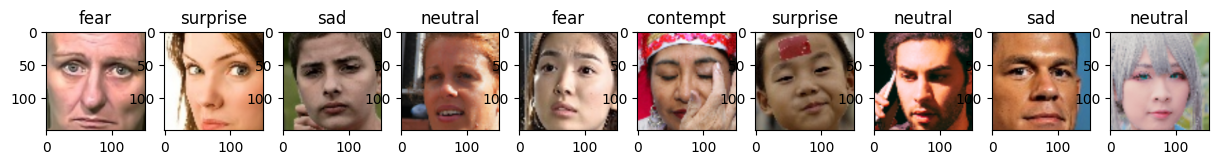

In [12]:
images,corr_labels = next(iter(affectnet_val))
show_predictions(model, images)